Sarah Millard   "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

In [1]:
# Imp. Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

## 1. Clean samplemissing.csv (the goal is to clean this data for further analysis)

### 1a. Import samplemissing.csv and show top five rows

In [2]:
df = pd.read_csv('data/samplemissing.csv')
df.head()

,ID,AGE,SEX,REGION,INCOME,MARRIED,CHILDREN,CAR
0,ID12701,23,MALE,INNER_CITY,18766.0,YES,1,YES
1,ID12702,30,NaN,RURAL,9915.0,NO,2,NO
2,ID12703,45,MALE,RURAL,21881.0,NO,0,YES
3,ID12704,50,MALE,TOWN,NaN,YES,2,NO
4,ID12705,41,FEMALE,INNER_CITY,80000.0,YES,0,NO


### 1b. Find out data types 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        11 non-null     object 
 1   AGE       11 non-null     int64  
 2   SEX       10 non-null     object 
 3   REGION    11 non-null     object 
 4   INCOME    10 non-null     float64
 5   MARRIED   11 non-null     object 
 6   CHILDREN  11 non-null     int64  
 7   CAR       11 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 832.0+ bytes


### 1c. Find basic statistics

In [4]:
df.describe()

,AGE,INCOME,CHILDREN
count,11.000000,10.000000,11.000000
mean,41.272727,26626.300000,10.090909
std,11.942285,21928.732775,29.504083
min,20.000000,-1000.000000,0.000000
25%,35.500000,17207.500000,0.500000
50%,45.000000,20751.000000,1.000000
75%,50.000000,32123.000000,2.000000
max,57.000000,80000.000000,99.000000


### 1d. Find any data quality issues. Describe the data quality issues and suggest how to handle them.

In [5]:
df['SEX'].describe()

count       10
unique       2
top       MALE
freq         5
Name: SEX, dtype: object

In [6]:
df['REGION'].describe()

count             11
unique             3
top       INNER_CITY
freq               6
Name: REGION, dtype: object

In [7]:
df['MARRIED'].describe()

count      11
unique      3
top       YES
freq        6
Name: MARRIED, dtype: object

In [8]:
df['CAR'].describe()

count      11
unique      2
top       YES
freq        7
Name: CAR, dtype: object

In [9]:
df.groupby('MARRIED').size()

MARRIED
NO     4
YES    6
Yes    1
dtype: int64

In [10]:
df

,ID,AGE,SEX,REGION,INCOME,MARRIED,CHILDREN,CAR
0,ID12701,23,MALE,INNER_CITY,18766.0,YES,1,YES
1,ID12702,30,NaN,RURAL,9915.0,NO,2,NO
2,ID12703,45,MALE,RURAL,21881.0,NO,0,YES
3,ID12704,50,MALE,TOWN,NaN,YES,2,NO
4,ID12705,41,FEMALE,INNER_CITY,80000.0,YES,0,NO
5,ID12706,20,MALE,INNER_CITY,16688.0,NO,1,NO
6,ID12707,46,FEMALE,RURAL,39068.0,YES,0,YES
7,ID12708,50,FEMALE,INNER_CITY,27740.0,YES,1,YES
8,ID12709,42,MALE,INNER_CITY,33584.0,NO,3,YES
9,ID12710,57,FEMALE,TOWN,19621.0,YES,99,YES


##### Data Quality Issues: Missing sex value, will most likely remove the row with the missing value. Missing Income value as well as a possible input mistake (-1000), for the input mistake will replace -1000 with 1000, for the missing value will replace it with the mean income. In the married column inconsistency with capital letters causing there to be 3 unique values, will replace the outlier with the correct syntax(Yes -> YES). In the children column 99 is not a valid number, replace that value with the mode. Could also remove the ID column as it does not seem needed.

### 1e. Handle inconsistent data and missing values

In [11]:
#starting with dropping the ID column
df = df.drop(['ID'], axis = 1)
df

,AGE,SEX,REGION,INCOME,MARRIED,CHILDREN,CAR
0,23,MALE,INNER_CITY,18766.0,YES,1,YES
1,30,NaN,RURAL,9915.0,NO,2,NO
2,45,MALE,RURAL,21881.0,NO,0,YES
3,50,MALE,TOWN,NaN,YES,2,NO
4,41,FEMALE,INNER_CITY,80000.0,YES,0,NO
5,20,MALE,INNER_CITY,16688.0,NO,1,NO
6,46,FEMALE,RURAL,39068.0,YES,0,YES
7,50,FEMALE,INNER_CITY,27740.0,YES,1,YES
8,42,MALE,INNER_CITY,33584.0,NO,3,YES
9,57,FEMALE,TOWN,19621.0,YES,99,YES


In [12]:
#now replace null value in income with the mean income
df = df.fillna({'INCOME' : 26626.300000})
df

,AGE,SEX,REGION,INCOME,MARRIED,CHILDREN,CAR
0,23,MALE,INNER_CITY,18766.0,YES,1,YES
1,30,NaN,RURAL,9915.0,NO,2,NO
2,45,MALE,RURAL,21881.0,NO,0,YES
3,50,MALE,TOWN,26626.3,YES,2,NO
4,41,FEMALE,INNER_CITY,80000.0,YES,0,NO
5,20,MALE,INNER_CITY,16688.0,NO,1,NO
6,46,FEMALE,RURAL,39068.0,YES,0,YES
7,50,FEMALE,INNER_CITY,27740.0,YES,1,YES
8,42,MALE,INNER_CITY,33584.0,NO,3,YES
9,57,FEMALE,TOWN,19621.0,YES,99,YES


In [13]:
#remove any other null values
df = df.dropna()
df

,AGE,SEX,REGION,INCOME,MARRIED,CHILDREN,CAR
0,23,MALE,INNER_CITY,18766.0,YES,1,YES
2,45,MALE,RURAL,21881.0,NO,0,YES
3,50,MALE,TOWN,26626.3,YES,2,NO
4,41,FEMALE,INNER_CITY,80000.0,YES,0,NO
5,20,MALE,INNER_CITY,16688.0,NO,1,NO
6,46,FEMALE,RURAL,39068.0,YES,0,YES
7,50,FEMALE,INNER_CITY,27740.0,YES,1,YES
8,42,MALE,INNER_CITY,33584.0,NO,3,YES
9,57,FEMALE,TOWN,19621.0,YES,99,YES
10,50,FEMALE,INNER_CITY,-1000.0,Yes,2,YES


In [14]:
#fix married column
df = df.replace('Yes', 'YES')
df

,AGE,SEX,REGION,INCOME,MARRIED,CHILDREN,CAR
0,23,MALE,INNER_CITY,18766.0,YES,1,YES
2,45,MALE,RURAL,21881.0,NO,0,YES
3,50,MALE,TOWN,26626.3,YES,2,NO
4,41,FEMALE,INNER_CITY,80000.0,YES,0,NO
5,20,MALE,INNER_CITY,16688.0,NO,1,NO
6,46,FEMALE,RURAL,39068.0,YES,0,YES
7,50,FEMALE,INNER_CITY,27740.0,YES,1,YES
8,42,MALE,INNER_CITY,33584.0,NO,3,YES
9,57,FEMALE,TOWN,19621.0,YES,99,YES
10,50,FEMALE,INNER_CITY,-1000.0,YES,2,YES


In [15]:
#replaceing out of place value in children with mode 
df.mode()
df = df.replace({'CHILDREN' : 99},{'CHILDREN' : 1 })
df

,AGE,SEX,REGION,INCOME,MARRIED,CHILDREN,CAR
0,23,MALE,INNER_CITY,18766.0,YES,1,YES
2,45,MALE,RURAL,21881.0,NO,0,YES
3,50,MALE,TOWN,26626.3,YES,2,NO
4,41,FEMALE,INNER_CITY,80000.0,YES,0,NO
5,20,MALE,INNER_CITY,16688.0,NO,1,NO
6,46,FEMALE,RURAL,39068.0,YES,0,YES
7,50,FEMALE,INNER_CITY,27740.0,YES,1,YES
8,42,MALE,INNER_CITY,33584.0,NO,3,YES
9,57,FEMALE,TOWN,19621.0,YES,1,YES
10,50,FEMALE,INNER_CITY,-1000.0,YES,2,YES


### 1f. Replace negative numbers (e.g., minus income) by zero

In [16]:
#fix negative income
df = df.replace(-1000, 0)
df

,AGE,SEX,REGION,INCOME,MARRIED,CHILDREN,CAR
0,23,MALE,INNER_CITY,18766.0,YES,1,YES
2,45,MALE,RURAL,21881.0,NO,0,YES
3,50,MALE,TOWN,26626.3,YES,2,NO
4,41,FEMALE,INNER_CITY,80000.0,YES,0,NO
5,20,MALE,INNER_CITY,16688.0,NO,1,NO
6,46,FEMALE,RURAL,39068.0,YES,0,YES
7,50,FEMALE,INNER_CITY,27740.0,YES,1,YES
8,42,MALE,INNER_CITY,33584.0,NO,3,YES
9,57,FEMALE,TOWN,19621.0,YES,1,YES
10,50,FEMALE,INNER_CITY,0.0,YES,2,YES


### 1g. Now, the data is expected to have no quality issue. Export the final data to csv or excel.

In [58]:
#export data to csv
clean_data = df
clean_data.to_csv("data/clean_data.csv")

## 2. TransformGermanCredit.xls1(the goal is to master intermediate data transformation techniques). 

### 2a. ImportGermanCredit.xls

In [62]:
# import germancredit.xls
data = pd.read_excel("data/GermanCredit.xls")
data.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,1
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,0


### 2b. How many rows are in the dataset?

In [65]:
data.describe()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,3271.258000,...,35.546000,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000,0.700000
std,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,2822.736876,...,11.375469,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,...,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1365.500000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.500000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3972.250000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18424.000000,...,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


### 2c. Report data types

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CHK_ACCT          1000 non-null   int64
 1   DURATION          1000 non-null   int64
 2   HISTORY           1000 non-null   int64
 3   NEW_CAR           1000 non-null   int64
 4   USED_CAR          1000 non-null   int64
 5   FURNITURE         1000 non-null   int64
 6   RADIO/TV          1000 non-null   int64
 7   EDUCATION         1000 non-null   int64
 8   RETRAINING        1000 non-null   int64
 9   AMOUNT            1000 non-null   int64
 10  SAV_ACCT          1000 non-null   int64
 11  EMPLOYMENT        1000 non-null   int64
 12  INSTALL_RATE      1000 non-null   int64
 13  MALE_DIV          1000 non-null   int64
 14  MALE_SINGLE       1000 non-null   int64
 15  MALE_MAR_or_WID   1000 non-null   int64
 16  CO-APPLICANT      1000 non-null   int64
 17  GUARANTOR         1000 non-null   

### 2d. Show histograms. Describe any (unexpected) findings from the histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a611610>,
      dtype=object)

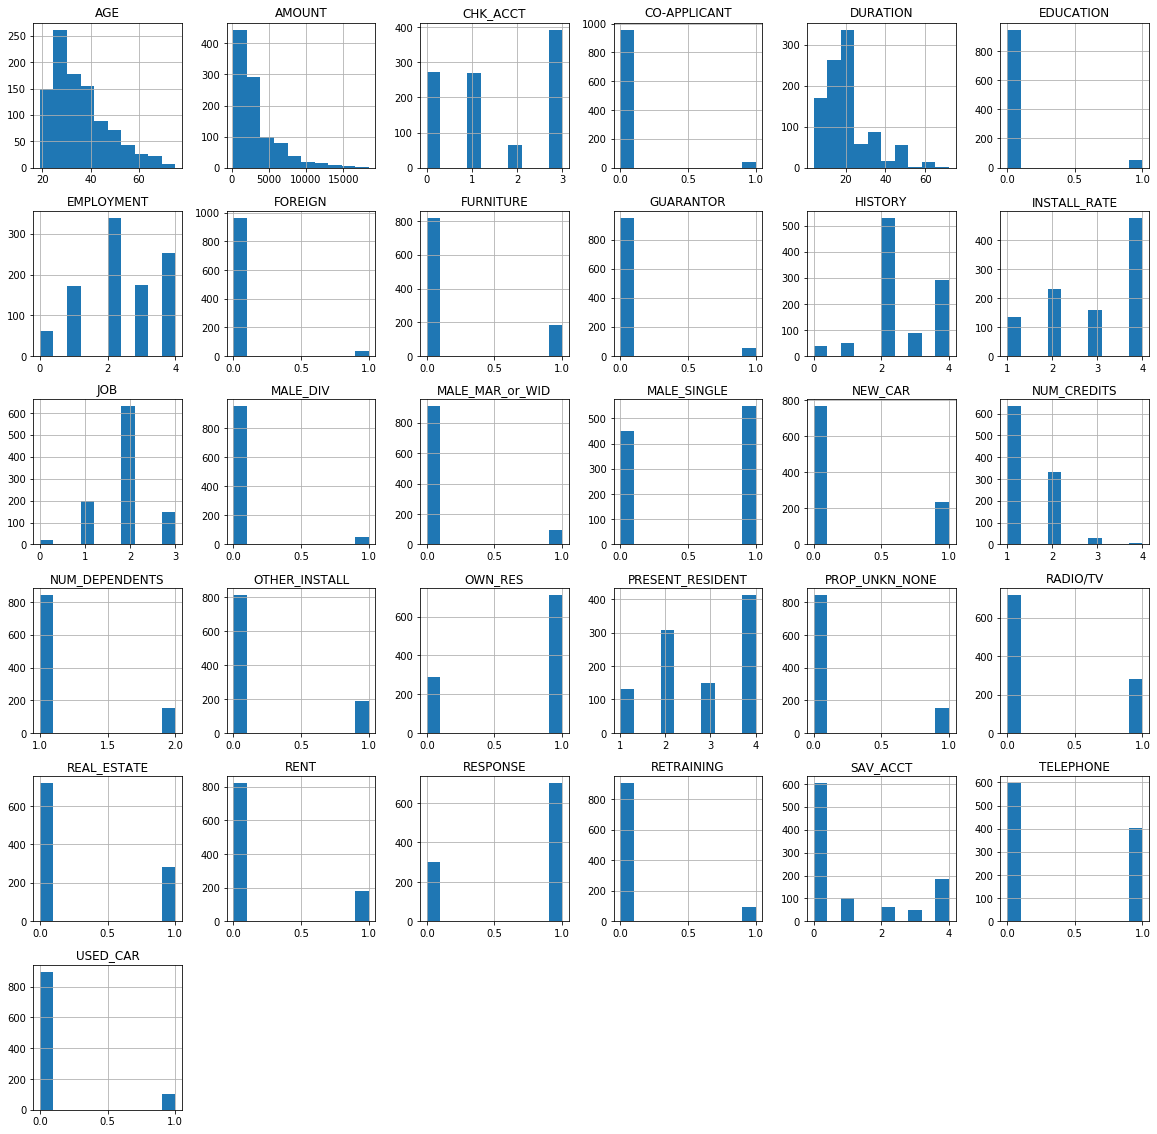

In [71]:
data.hist(figsize=(20,20))

##### One unexpected finding is that it seems a majority of people do not have a radio or tv.

### 2e. How many people have “good credit”? (groupby RESPONSE column) 1 means good credit; 0 is bad credit

In [73]:
#groupby response
data.groupby('RESPONSE').size()
#700 have good credit

RESPONSE
0    300
1    700
dtype: int64

### 2f. Some columns may beunnecessary for further analysis. Remove two or three columns

In [74]:
data = data.drop("TELEPHONE", axis = 1)
data = data.drop("FOREIGN", axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CHK_ACCT          1000 non-null   int64
 1   DURATION          1000 non-null   int64
 2   HISTORY           1000 non-null   int64
 3   NEW_CAR           1000 non-null   int64
 4   USED_CAR          1000 non-null   int64
 5   FURNITURE         1000 non-null   int64
 6   RADIO/TV          1000 non-null   int64
 7   EDUCATION         1000 non-null   int64
 8   RETRAINING        1000 non-null   int64
 9   AMOUNT            1000 non-null   int64
 10  SAV_ACCT          1000 non-null   int64
 11  EMPLOYMENT        1000 non-null   int64
 12  INSTALL_RATE      1000 non-null   int64
 13  MALE_DIV          1000 non-null   int64
 14  MALE_SINGLE       1000 non-null   int64
 15  MALE_MAR_or_WID   1000 non-null   int64
 16  CO-APPLICANT      1000 non-null   int64
 17  GUARANTOR         1000 non-null   

### 2g. Rename some columns

In [75]:
data = data.rename(columns={'AMOUNT' : "AMT"})
data = data.rename(columns={'PRESENT_RESIDENT' : "PRESENT_RES"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CHK_ACCT         1000 non-null   int64
 1   DURATION         1000 non-null   int64
 2   HISTORY          1000 non-null   int64
 3   NEW_CAR          1000 non-null   int64
 4   USED_CAR         1000 non-null   int64
 5   FURNITURE        1000 non-null   int64
 6   RADIO/TV         1000 non-null   int64
 7   EDUCATION        1000 non-null   int64
 8   RETRAINING       1000 non-null   int64
 9   AMT              1000 non-null   int64
 10  SAV_ACCT         1000 non-null   int64
 11  EMPLOYMENT       1000 non-null   int64
 12  INSTALL_RATE     1000 non-null   int64
 13  MALE_DIV         1000 non-null   int64
 14  MALE_SINGLE      1000 non-null   int64
 15  MALE_MAR_or_WID  1000 non-null   int64
 16  CO-APPLICANT     1000 non-null   int64
 17  GUARANTOR        1000 non-null   int64
 18  PRESENT_R

### 2h. Create new columns based on existing columns

In [76]:
data['AMOUNT'] = data['AMT']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CHK_ACCT         1000 non-null   int64
 1   DURATION         1000 non-null   int64
 2   HISTORY          1000 non-null   int64
 3   NEW_CAR          1000 non-null   int64
 4   USED_CAR         1000 non-null   int64
 5   FURNITURE        1000 non-null   int64
 6   RADIO/TV         1000 non-null   int64
 7   EDUCATION        1000 non-null   int64
 8   RETRAINING       1000 non-null   int64
 9   AMT              1000 non-null   int64
 10  SAV_ACCT         1000 non-null   int64
 11  EMPLOYMENT       1000 non-null   int64
 12  INSTALL_RATE     1000 non-null   int64
 13  MALE_DIV         1000 non-null   int64
 14  MALE_SINGLE      1000 non-null   int64
 15  MALE_MAR_or_WID  1000 non-null   int64
 16  CO-APPLICANT     1000 non-null   int64
 17  GUARANTOR        1000 non-null   int64
 18  PRESENT_R

### 2i. Create 3 bins using the amount column and label them as 1, 2, and 3

In [77]:
data['AMOUNT'] = pd.qcut(data['AMOUNT'], 3, labels = ['1', '2', '3'])
data.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMT,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,RESPONSE,AMOUNT
0,0,6,4,0,0,0,1,0,0,1169,...,0,67,0,0,1,2,2,1,1,1
1,1,48,2,0,0,0,1,0,0,5951,...,0,22,0,0,1,1,2,1,0,3
2,3,12,4,0,0,0,0,1,0,2096,...,0,49,0,0,1,1,1,2,1,2
3,0,42,2,0,0,1,0,0,0,7882,...,0,45,0,0,0,1,2,2,1,3
4,0,24,3,1,0,0,0,0,0,4870,...,1,53,0,0,0,2,2,2,0,3


### 2j. Change the data type of RESPONSE (from number to string)

In [78]:
data['RESPONSE'] = data['RESPONSE'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CHK_ACCT         1000 non-null   int64   
 1   DURATION         1000 non-null   int64   
 2   HISTORY          1000 non-null   int64   
 3   NEW_CAR          1000 non-null   int64   
 4   USED_CAR         1000 non-null   int64   
 5   FURNITURE        1000 non-null   int64   
 6   RADIO/TV         1000 non-null   int64   
 7   EDUCATION        1000 non-null   int64   
 8   RETRAINING       1000 non-null   int64   
 9   AMT              1000 non-null   int64   
 10  SAV_ACCT         1000 non-null   int64   
 11  EMPLOYMENT       1000 non-null   int64   
 12  INSTALL_RATE     1000 non-null   int64   
 13  MALE_DIV         1000 non-null   int64   
 14  MALE_SINGLE      1000 non-null   int64   
 15  MALE_MAR_or_WID  1000 non-null   int64   
 16  CO-APPLICANT     1000 non-null   int64   
 

### 2k. Replace 0 and 1 with false and true respectively

In [83]:
data['RESPONSE'] = data['RESPONSE'].map({0 : 'False', 1 : 'True'})
data.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMT,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,RESPONSE,AMOUNT
0,0,6,4,0,0,0,1,0,0,1169,...,0,67,0,0,1,2,2,1,NaN,1
1,1,48,2,0,0,0,1,0,0,5951,...,0,22,0,0,1,1,2,1,NaN,3
2,3,12,4,0,0,0,0,1,0,2096,...,0,49,0,0,1,1,1,2,NaN,2
3,0,42,2,0,0,1,0,0,0,7882,...,0,45,0,0,0,1,2,2,NaN,3
4,0,24,3,1,0,0,0,0,0,4870,...,1,53,0,0,0,2,2,2,NaN,3


### 2l. Filter rows using a criterion

In [84]:
#People who have a loan amount over 10,000
data[(data['AMT'] > 10000)]


,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMT,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,RESPONSE,AMOUNT
18,1,24,2,0,1,0,0,0,0,12579,...,1,44,0,0,0,1,3,1,NaN,3
63,1,48,0,0,0,0,0,0,1,14421,...,0,25,0,0,1,1,2,1,NaN,3
87,1,36,2,0,0,0,0,1,0,12612,...,1,47,0,0,0,1,2,2,NaN,3
95,1,54,0,0,0,0,0,0,1,15945,...,1,58,0,1,0,1,2,1,NaN,3
105,1,24,4,0,0,0,0,0,0,11938,...,0,39,0,0,1,2,3,2,NaN,3
134,3,60,2,0,0,0,1,0,0,10144,...,0,21,0,0,1,1,2,1,NaN,3
205,0,30,4,0,1,0,0,0,0,10623,...,1,38,0,0,0,3,3,2,NaN,3
226,1,48,2,0,0,0,1,0,0,10961,...,1,27,1,0,1,2,2,1,NaN,3
236,1,6,2,1,0,0,0,0,0,14555,...,0,23,0,0,1,1,0,1,NaN,3
272,1,48,1,1,0,0,0,0,0,12169,...,1,36,0,0,0,1,3,1,NaN,3


### 2m. Filter rows using two criteria

In [85]:
#People who's loan amount is over 10,000 and are younger than 25
data[(data['AMT'] > 10000) & (data['AGE'] < 25)]

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMT,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,RESPONSE,AMOUNT
134,3,60,2,0,0,0,1,0,0,10144,...,0,21,0,0,1,1,2,1,NaN,3
236,1,6,2,1,0,0,0,0,0,14555,...,0,23,0,0,1,1,0,1,NaN,3
333,3,48,4,0,1,0,0,0,0,11590,...,0,24,1,1,0,2,1,1,NaN,3
637,3,60,3,0,0,0,1,0,0,15653,...,0,21,0,0,1,2,2,1,NaN,3
736,1,24,2,0,1,0,0,0,0,11560,...,0,23,0,1,0,2,3,1,NaN,3
887,1,48,2,0,0,0,0,0,1,15672,...,0,23,0,0,1,1,2,1,NaN,3


### 2n. Finally, (randomly) sample 20 rows and export them to csv or excel file. 

In [88]:
data_20 = data.sample(20)
data_20.to_csv("data/data_20.csv")

## 3. Integrate multiple datasets: customer.xls and order.xls (the goal is to master data integration techniques using join)

### 3a. Import both datasets

In [96]:
customer = pd.read_excel("data/customer.xls")
customer

,CustomerID,FirstName,LastName,Email,DOB,Phone
0,1,John,Smith,John.Smith@yahoo.com,1968-02-04,626 222-2222
1,2,Steven,Goldfish,goldfish@fishhere.net,1974-04-04,323 455-4545
2,3,Paula,Brown,pb@herowndomain.org,1978-05-24,416 323-3232
3,4,James,Smith,jim@supergig.co.uk,1980-02-10,416 323-8888


In [97]:
order = pd.read_excel("data/order.xls")
order

,CustomerID,Order_Id,OrderNo
0,3,1,77895
1,3,2,44678
2,1,3,22456
3,1,4,24562
4,15,5,34764


### 3b. Identify the primary (or common) key for joining

##### The common key for these data sets is CustomerID

### 3c. Perform inner join, left join, and right join. Discuss the results of the three types of join

In [93]:
#inner join
customer.merge(order, on = 'CustomerID', how = 'inner')

,CustomerID,FirstName,LastName,Email,DOB,Phone,Order_Id,OrderNo
0,1,John,Smith,John.Smith@yahoo.com,1968-02-04,626 222-2222,3,22456
1,1,John,Smith,John.Smith@yahoo.com,1968-02-04,626 222-2222,4,24562
2,3,Paula,Brown,pb@herowndomain.org,1978-05-24,416 323-3232,1,77895
3,3,Paula,Brown,pb@herowndomain.org,1978-05-24,416 323-3232,2,44678


In [94]:
#right join
customer.merge(order, on = 'CustomerID', how = 'right')

,CustomerID,FirstName,LastName,Email,DOB,Phone,Order_Id,OrderNo
0,1,John,Smith,John.Smith@yahoo.com,1968-02-04,626 222-2222,3,22456
1,1,John,Smith,John.Smith@yahoo.com,1968-02-04,626 222-2222,4,24562
2,3,Paula,Brown,pb@herowndomain.org,1978-05-24,416 323-3232,1,77895
3,3,Paula,Brown,pb@herowndomain.org,1978-05-24,416 323-3232,2,44678
4,15,NaN,NaN,NaN,NaT,NaN,5,34764


In [95]:
#left join
customer.merge(order, on = 'CustomerID', how = 'left')

,CustomerID,FirstName,LastName,Email,DOB,Phone,Order_Id,OrderNo
0,1,John,Smith,John.Smith@yahoo.com,1968-02-04,626 222-2222,3.0,22456.0
1,1,John,Smith,John.Smith@yahoo.com,1968-02-04,626 222-2222,4.0,24562.0
2,2,Steven,Goldfish,goldfish@fishhere.net,1974-04-04,323 455-4545,NaN,NaN
3,3,Paula,Brown,pb@herowndomain.org,1978-05-24,416 323-3232,1.0,77895.0
4,3,Paula,Brown,pb@herowndomain.org,1978-05-24,416 323-3232,2.0,44678.0
5,4,James,Smith,jim@supergig.co.uk,1980-02-10,416 323-8888,NaN,NaN


##### The inner join got rid of the row with customer id 15, the right join kept the customer id 15, and the left join had john and paula twice while steven and james showed up only once.

### 3d. What’s the purpose of Join? 

##### The purpose of join is to combine data sets in order to get a more complete data set to analyze.